# PART 2 - Introduction to Data Science Project
### Replication of the results achieved in the paper.
#### by **Mario Fernández Rueda**

In [165]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost
from xgboost import XGBClassifier



In this part of the project we will follow the process of the pdf file.

We start loading the data:

In [140]:
df = pd.read_csv('shot_logs.csv')
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


**DATA TRANSFORMATION**

First o fall, we drop the columns PTS and FGM which are perfect predictors of the success of the made shots.

Also we transform the GAME_CLOCK string into a number. 

After that, the preprocessing is different depending on the used technique.

In [141]:
df = df.drop(['PTS','FGM'], axis=1)
df['GAME_CLOCK'] = df['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

df.head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,brian roberts,203148


**LOGISTIC REGRESSION**

We eliminate the categorical variables that had more than two categories, such as "GAME ID", "MATCHUP", "CLOSEST DEFENDER", "CLOSEST DEFENDER PLAYER ID", "player name" and "player id" (and PERIOD that is not said in the file), because by replacing the categories with integer values, the integer values had no inherent meaning or trend and could confound a model attempting to learn linear weights.

To don't lose information about the time with the period we add "TOTAL GAME TIME" which combines "PERIOD" with "GAME_CLOCK". Every match has 2880 seconds, every period has 12 minutes (720 seconds). With this calculation we will know how many seconds of the game are left.

In [142]:
df_log = df.drop(['GAME_ID','MATCHUP','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id', 'PERIOD'], axis=1)

df_log['TOTAL_GAME_TIME'] = 2880 - (((df['PERIOD'] -1)*720) + df['GAME_CLOCK'])

df_log.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,TOTAL_GAME_TIME
0,A,W,24,1,69,10.8,2,1.9,7.7,2,made,1.3,2811
1,A,W,24,2,14,3.4,0,0.8,28.2,3,missed,6.1,2866
2,A,W,24,3,0,NaN,3,2.7,10.1,2,missed,0.9,2880
3,A,W,24,4,707,10.3,2,1.9,17.2,2,missed,3.4,1453
4,A,W,24,5,634,10.9,2,2.7,3.7,2,missed,1.1,1526


Let's normalize the data. We have some categorical string values so we need to take them into account.

In [143]:
# Create a new DataFrame with only numeric columns
df_log_numeric = df_log.select_dtypes(include=[np.number])

# Normalize the numeric columns
scaler = MinMaxScaler()
df_log_normalized = pd.DataFrame(scaler.fit_transform(df_log_numeric), columns=df_log_numeric.columns)

#the categorical columns put 1 or 0
df_log_string = df_log.select_dtypes(include=[object])

# Apply LabelEncoder to each column
label_encoder = LabelEncoder()
for column in df_log_string.columns:
    df_log_string[column] = label_encoder.fit_transform(df_log_string[column])

# 1 made -1 missed
df_log_string['SHOT_RESULT'] = df_log_string['SHOT_RESULT'].replace({0: 1, 1: -1})

# Concatenate the normalized and encoded DataFrames
df_log_normal = pd.concat([df_log_normalized, df_log_string], axis=1)

df_log_normal.head()

,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,TOTAL_GAME_TIME,LOCATION,W,SHOT_RESULT
0,0.726415,0.000000,0.095833,0.450000,0.06250,0.877984,0.163136,0.0,0.024436,0.985033,0,1,1
1,0.726415,0.027027,0.019444,0.141667,0.00000,0.872149,0.597458,1.0,0.114662,0.996963,0,1,-1
2,0.726415,0.054054,0.000000,NaN,0.09375,0.882228,0.213983,0.0,0.016917,1.000000,0,1,-1
3,0.726415,0.081081,0.981944,0.429167,0.06250,0.877984,0.364407,0.0,0.063910,0.690456,0,1,-1
4,0.726415,0.108108,0.880556,0.454167,0.06250,0.882228,0.078390,0.0,0.020677,0.706291,0,1,-1


Splitting the data. We use 95 % of the data to train the model and 5 % for test.

In [144]:
# Drop rows with NaN values
df_log_normal = df_log_normal.dropna()

X = df_log_normal.drop(['SHOT_RESULT'], axis=1)
y = df_log_normal[['SHOT_RESULT']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

Train the model:

C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.603656545870062
              precision    recall  f1-score   support

          -1       0.62      0.71      0.66      3355
           1       0.57      0.48      0.52      2771

    accuracy                           0.60      6126
   macro avg       0.60      0.59      0.59      6126
weighted avg       0.60      0.60      0.60      6126



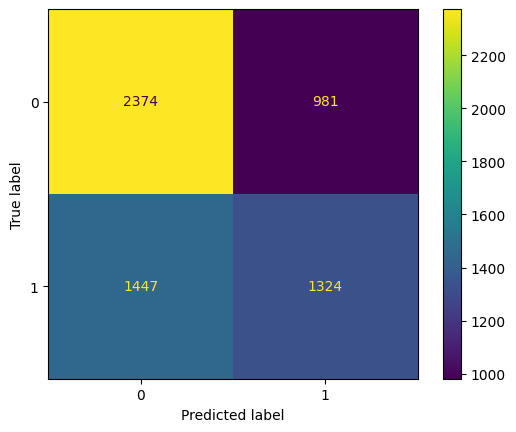

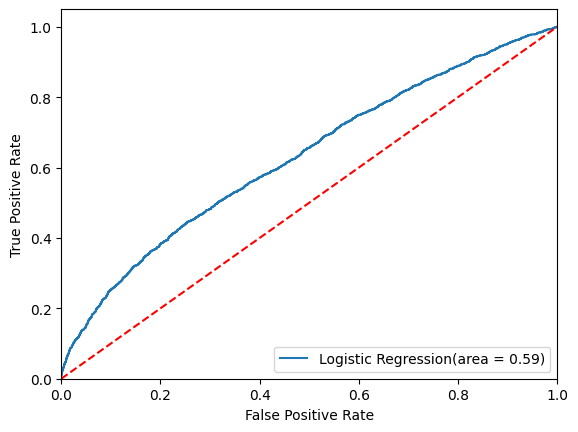

In [145]:
#logistic regression
# α = 10, λ = 0.0001 and gradient descent
logreg = LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


With logistic regression model we get an accuracy (60.36 %) that is very similar to the one of the pdf file (59 %).
The confussion matrix is quite different to the one of the paper, maybe because of the data split or the examples used. All the confussion matrices of all the notebook won't be the same as the ones of the papers.


**SVM**

We drop the categorical features: "GAME ID", "MATCHUP", "CLOSEST DEFENDER", "CLOSEST DEFENDER PLAYER ID", "player name" and "player id" (and PERIOD that is not said in the file).

Add the "TOTAL GAME TIME" column.

In [146]:
df_svm = df.drop(['GAME_ID','MATCHUP','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id', 'PERIOD'], axis=1)

df_svm['TOTAL_GAME_TIME'] = 2880 - (((df['PERIOD'] -1)*720) + df['GAME_CLOCK'])

df_svm.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,TOTAL_GAME_TIME
0,A,W,24,1,69,10.8,2,1.9,7.7,2,made,1.3,2811
1,A,W,24,2,14,3.4,0,0.8,28.2,3,missed,6.1,2866
2,A,W,24,3,0,NaN,3,2.7,10.1,2,missed,0.9,2880
3,A,W,24,4,707,10.3,2,1.9,17.2,2,missed,3.4,1453
4,A,W,24,5,634,10.9,2,2.7,3.7,2,missed,1.1,1526


Then the data is normalized:

In [147]:
# Create a new DataFrame with only numeric columns
df_svm_numeric = df_svm.select_dtypes(include=[np.number])

# Normalize the numeric columns
scaler = MinMaxScaler()
df_svm_normalized = pd.DataFrame(scaler.fit_transform(df_svm_numeric), columns=df_svm_numeric.columns)

#the categorical columns put 1 or 0
df_svm_string = df_svm.select_dtypes(include=[object])

# Apply LabelEncoder to each column
label_encoder = LabelEncoder()
for column in df_svm_string.columns:
    df_svm_string[column] = label_encoder.fit_transform(df_svm_string[column])

# 1 made -1 missed
df_svm_string['SHOT_RESULT'] = df_svm_string['SHOT_RESULT'].replace({0: 1, 1: -1})

# Concatenate the normalized and encoded DataFrames
df_svm_final = pd.concat([df_svm_normalized, df_svm_string], axis=1)

df_svm_final.head()

,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,TOTAL_GAME_TIME,LOCATION,W,SHOT_RESULT
0,0.726415,0.000000,0.095833,0.450000,0.06250,0.877984,0.163136,0.0,0.024436,0.985033,0,1,1
1,0.726415,0.027027,0.019444,0.141667,0.00000,0.872149,0.597458,1.0,0.114662,0.996963,0,1,-1
2,0.726415,0.054054,0.000000,NaN,0.09375,0.882228,0.213983,0.0,0.016917,1.000000,0,1,-1
3,0.726415,0.081081,0.981944,0.429167,0.06250,0.877984,0.364407,0.0,0.063910,0.690456,0,1,-1
4,0.726415,0.108108,0.880556,0.454167,0.06250,0.882228,0.078390,0.0,0.020677,0.706291,0,1,-1


Splitting the data. We use 95 % of the data to train the model and 5 % for test.

In [148]:
df_svm_final = df_svm_final.dropna()

X = df_svm_final.drop(['SHOT_RESULT'], axis=1)
y = df_svm_final[['SHOT_RESULT']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

Then we create the SVM model.

C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.5355860267711394
              precision    recall  f1-score   support

          -1       0.54      0.93      0.69      3355
           1       0.41      0.06      0.10      2771

    accuracy                           0.54      6126
   macro avg       0.47      0.49      0.39      6126
weighted avg       0.48      0.54      0.42      6126



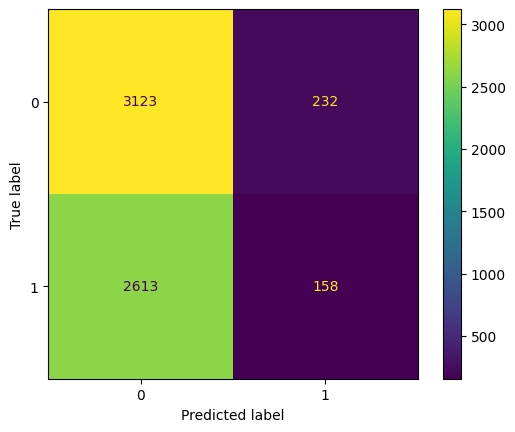

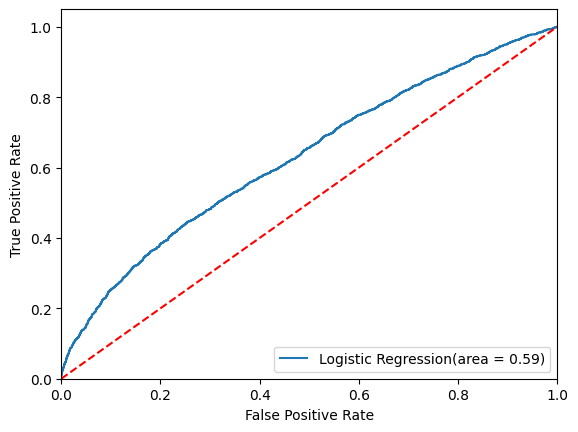

In [149]:
model = svm.SVC(max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

With SVM model we get an accuracy (53.55 %) that is very similar to the one of the pdf file (55 %).

**NEURAL NETWORKS**

We drop the categorical features: "GAME ID", "MATCHUP", "CLOSEST DEFENDER", "CLOSEST DEFENDER PLAYER ID", "player name" and "player id" (and PERIOD that is not said in the file).

Add the "TOTAL GAME TIME" column.

In [150]:
df_nn = df.drop(['GAME_ID','MATCHUP','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id', 'PERIOD'], axis=1)

df_nn['TOTAL_GAME_TIME'] = 2880 - (((df['PERIOD'] -1)*720) + df['GAME_CLOCK'])

df_nn.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,TOTAL_GAME_TIME
0,A,W,24,1,69,10.8,2,1.9,7.7,2,made,1.3,2811
1,A,W,24,2,14,3.4,0,0.8,28.2,3,missed,6.1,2866
2,A,W,24,3,0,NaN,3,2.7,10.1,2,missed,0.9,2880
3,A,W,24,4,707,10.3,2,1.9,17.2,2,missed,3.4,1453
4,A,W,24,5,634,10.9,2,2.7,3.7,2,missed,1.1,1526


Then the data is normalized:

In [151]:
# Create a new DataFrame with only numeric columns
df_nn_numeric = df_nn.select_dtypes(include=[np.number])

# Normalize the numeric columns
df_nn_normalized = pd.DataFrame(scaler.fit_transform(df_nn_numeric), columns=df_nn_numeric.columns)

#the categorical columns put 1 or 0
df_nn_string = df_nn.select_dtypes(include=[object])

# Apply LabelEncoder to each column
for column in df_nn_string.columns:
    df_nn_string[column] = label_encoder.fit_transform(df_nn_string[column])

# made = 1, missed = -1
df_nn_string['SHOT_RESULT'] = df_nn_string['SHOT_RESULT'].replace({0: 1, 1: -1})

# Concatenate the normalized and encoded DataFrames
df_nn_final = pd.concat([df_nn_normalized, df_nn_string], axis=1)

df_nn_final.head()

,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,TOTAL_GAME_TIME,LOCATION,W,SHOT_RESULT
0,0.726415,0.000000,0.095833,0.450000,0.06250,0.877984,0.163136,0.0,0.024436,0.985033,0,1,1
1,0.726415,0.027027,0.019444,0.141667,0.00000,0.872149,0.597458,1.0,0.114662,0.996963,0,1,-1
2,0.726415,0.054054,0.000000,NaN,0.09375,0.882228,0.213983,0.0,0.016917,1.000000,0,1,-1
3,0.726415,0.081081,0.981944,0.429167,0.06250,0.877984,0.364407,0.0,0.063910,0.690456,0,1,-1
4,0.726415,0.108108,0.880556,0.454167,0.06250,0.882228,0.078390,0.0,0.020677,0.706291,0,1,-1


Splitting the data. For Neural Networks we use 90 % of the data to train the model and 10 % for test.

In [152]:
#drop rows with NaN values
df_nn_final = df_nn_final.dropna()

X = df_nn_final.drop(['SHOT_RESULT'], axis=1)
y = df_nn_final[['SHOT_RESULT']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Let's train the Full sigmoid network:

C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.45703893842232723
Test Accuracy: 0.448208309525753
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      6760
           1       0.45      1.00      0.62      5491

    accuracy                           0.45     12251
   macro avg       0.22      0.50      0.31     12251
weighted avg       0.20      0.45      0.28     12251



C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

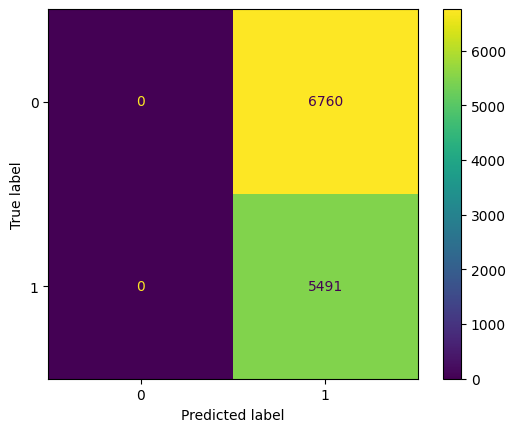

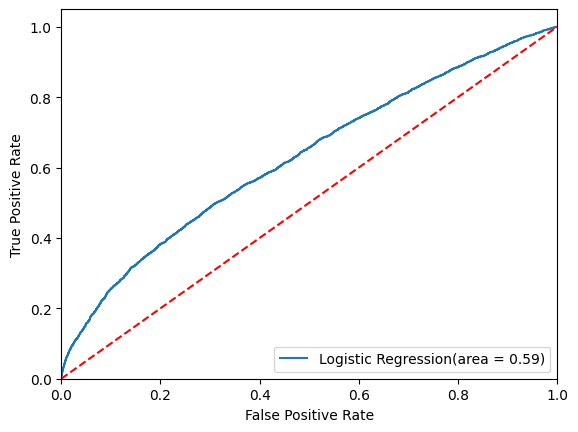

In [153]:
# Create a fully sigmoid neural network with 50 hidden neurons
sigmoid_nn = MLPClassifier(hidden_layer_sizes=(50,), batch_size=1000, learning_rate_init=5, alpha=0.0001, 
                           activation='logistic', max_iter=90, random_state=42)

# Fit the model with your training data
sigmoid_nn.fit(X_train, y_train)
y_pred = sigmoid_nn.predict(X_test)

# Calculate the accuracy of the model
accuracy_train = sigmoid_nn.score(X_train, y_train)
accuracy_test = sigmoid_nn.score(X_test, y_test)
print(f'Training Accuracy: {accuracy_train}')
print(f'Test Accuracy: {accuracy_test}')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

And then the RELU/sigmoid network:

C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.45703893842232723
Test Accuracy: 0.448208309525753
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      6760
           1       0.45      1.00      0.62      5491

    accuracy                           0.45     12251
   macro avg       0.22      0.50      0.31     12251
weighted avg       0.20      0.45      0.28     12251



C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

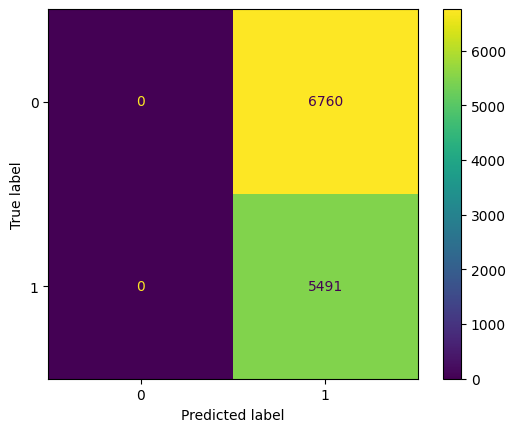

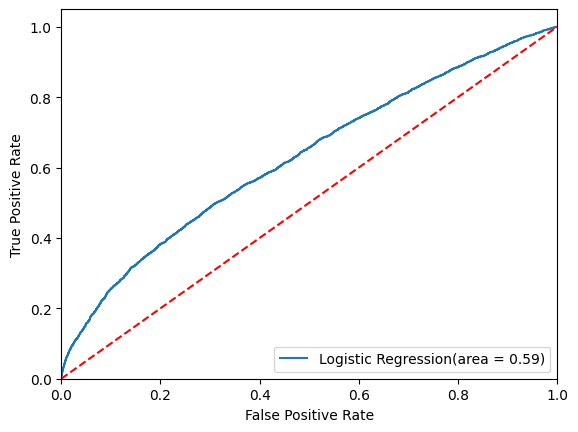

In [154]:
# Create a RELU/sigmoid neural network with 50 hidden neurons
relu_nn = MLPClassifier(hidden_layer_sizes=(50,), batch_size=1000, learning_rate_init=5, alpha=0.0001, 
                        activation='relu', max_iter=90, random_state=42)

# Fit the model with your training data
relu_nn.fit(X_train, y_train)
y_pred = relu_nn.predict(X_test)

# Calculate the accuracy of the model
accuracy_train = relu_nn.score(X_train, y_train)
accuracy_test = relu_nn.score(X_test, y_test)
print(f'Training Accuracy: {accuracy_train}')
print(f'Test Accuracy: {accuracy_test}')


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

With the neural networks we don't have similarity between our accuracy and the paper one:
* **Sigmoid**: Our accuracy -> Training: 45.7 %, Test Accuracy: 44.82. Paper's accuracy -> 56% on the training and 55% on the test.

* **RELU/Sigmoid**: Our accuracy -> Training: 45.7 %, Test Accuracy: 44.82. Paper's accuracy -> 53% on the training and 55% on the test.

**NAIVE-BAYES**

For Naive-Bayes model we binned the data (continuous) into 4 categories: >1 std dev below mean, 1 std dev below mean, 1 std dev above mean, and >1 std dev above mean. Again we need to deal with the strings columns.

In [158]:
df_naive = df_nn_final.copy()

# List of columns to exclude
exclude_columns = ['LOCATION','W','SHOT_RESULT']

# Select only the continuous columns
continuous_columns = [col for col in df_naive.select_dtypes(include=[np.number]).columns if col not in exclude_columns]

#new dataframe empty
df_new = pd.DataFrame()

for column in continuous_columns:
    std = df_naive[column].std()
    mean = df_naive[column].mean()

    # Define bin edges
    bins = [-np.inf, mean - std, mean, mean + std, np.inf]

    # Define labels
    labels = [1, 2, 3, 4]

    # Create binned column
    df_naive[column] = pd.cut(df_naive[column], bins=bins, labels=labels)


df_naive.head()

,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,TOTAL_GAME_TIME,LOCATION,W,SHOT_RESULT
0,4,1,1,2,3,2,2,2,1,4,0,1,1
1,4,2,1,1,2,2,4,4,3,4,0,1,-1
3,4,2,4,2,3,2,3,2,2,2,0,1,-1
4,4,2,4,2,3,2,1,2,1,3,0,1,-1
5,4,2,3,2,3,3,3,2,2,3,0,1,-1


Splitting the data. We use 95 % of the data to train the model and 5 % for test.

In [159]:
df_naive = df_naive.dropna()

X = df_naive.drop(['SHOT_RESULT'], axis=1)
y = df_naive['SHOT_RESULT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

Let's train the model:

Accuracy: 0.5977799542931767
              precision    recall  f1-score   support

          -1       0.60      0.80      0.68      3355
           1       0.59      0.36      0.44      2771

    accuracy                           0.60      6126
   macro avg       0.60      0.58      0.56      6126
weighted avg       0.60      0.60      0.58      6126



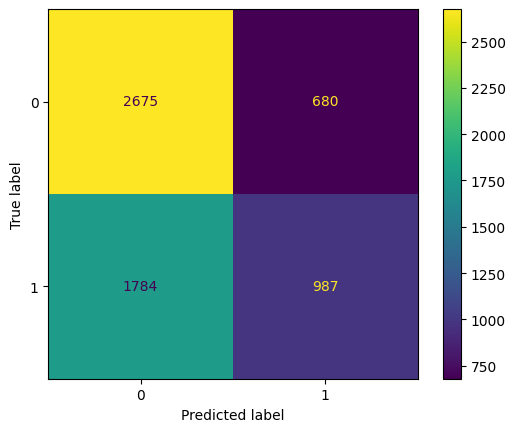

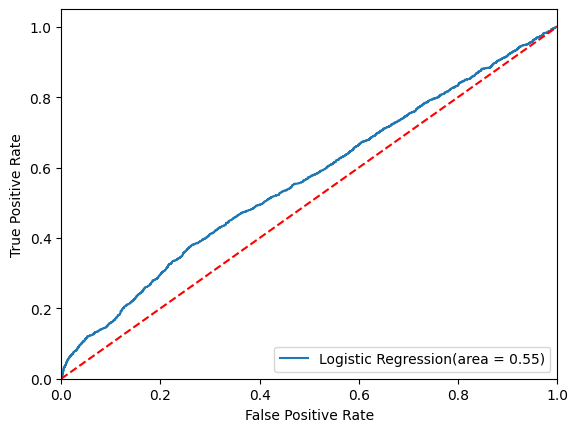

In [160]:
#no parameters
model = MultinomialNB()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In the Naive-Bayes model we have again a differences between the acuuracy levels: Our accuracy -> 60 %. Paper's accuracy -> 54%. In this case, we got more than the paper's ones.

**RANDOM FOREST**

Splitting the data. We use 95 % of the data to train the model and 5 % for test.

In [161]:
df_random = df_nn_final.copy()

X = df_random.drop(['SHOT_RESULT'], axis=1)
y = df_random['SHOT_RESULT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

Let's train the model:

Accuracy: 0.6026771139405811
              precision    recall  f1-score   support

          -1       0.60      0.81      0.69      3355
           1       0.60      0.36      0.45      2771

    accuracy                           0.60      6126
   macro avg       0.60      0.58      0.57      6126
weighted avg       0.60      0.60      0.58      6126



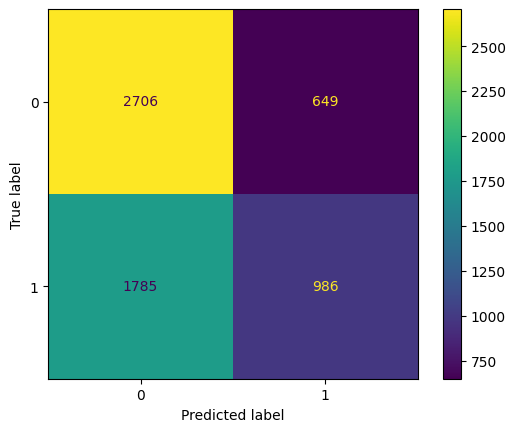

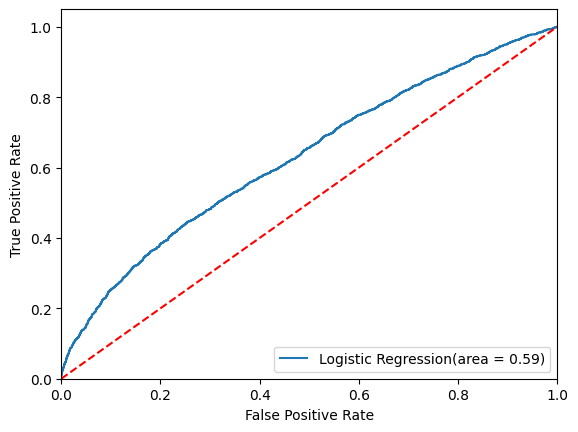

In [162]:
# 80 trees, 50 minimum leaves, and sampling without replacement
model = RandomForestClassifier(n_estimators=80, min_samples_leaf=50, bootstrap=True, random_state=42)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In the forest we have 60 % of accuracy again and in the paper 61 %. Two very similar values.

**BOOSTING**

Splitting the data. We use 95 % of the data to train the model and 5 % for test.

In [169]:
df_boosting = df_nn_final.copy()

df_boosting['SHOT_RESULT'] = df_boosting['SHOT_RESULT'].replace({-1: 0})

X = df_boosting.drop(['SHOT_RESULT'], axis=1)
y = df_boosting['SHOT_RESULT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

Let's train the model:

Accuracy: 0.5476656872347372
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      3355
           1       0.00      0.00      0.00      2771

    accuracy                           0.55      6126
   macro avg       0.27      0.50      0.35      6126
weighted avg       0.30      0.55      0.39      6126



C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario.fernandezr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

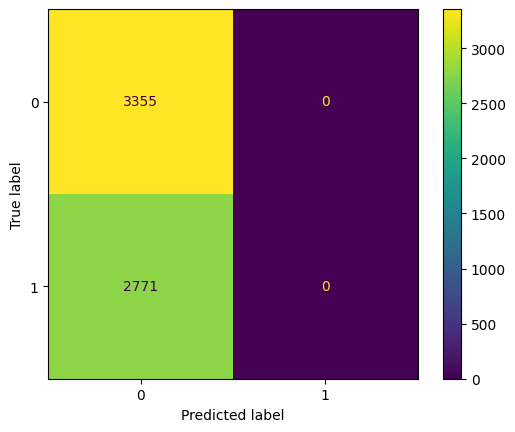

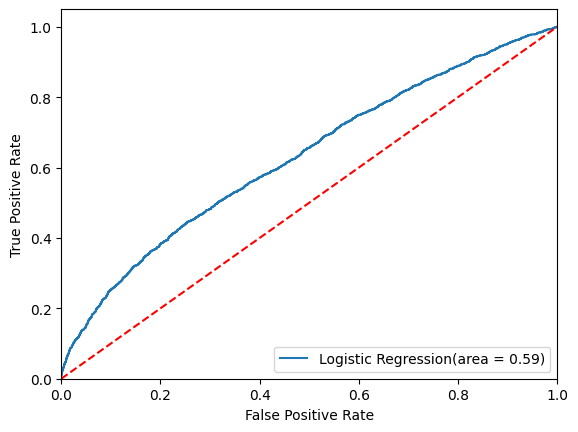

In [170]:
#Xboosting model
# 1 estimator, learning rate α = 0.0001, max depth 3, and a minimum child node weight of 0.0001.
model = XGBClassifier(n_estimators=1, learning_rate=0.0001, max_depth=3, min_child_weight=0.0001, random_state=42)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#classification report
print(classification_report(y_test, y_pred))

#roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Talking about boosting, we have again difference between the accuracies. Our accuracy is 55 % and the paper's one is 68 %.

**CONCLUSION**

In conclusion, the paper identifies the Random Forest Classifier and Xboosting (the best) as the best-performing models, but my personal results demonstrates that the Logistic Regression and Random Forest Classifier are the best, considering their accuracy. I think that the found differences of the accuracy values, especially in the Xboosting and Naive-Bayes are due to in the paper almost nothing appears about the preparation of the data, so I needed to use the prepared data for neural networks, SVM and logistic regression.
The confusion matrices of these models exhibit significant disparities compared with the ones of the paper, potentially influenced by variations in dataset sizes or the training and test data split. 
Even though I have already worked with some of these tools and models, working with them again has helped me to remember certain aspects of them , the experience has contributed to a deeper understanding of machine learning algorithms and their application in binary classification problems.
Personaly, for my personal experience, I enjoyed a lot doing this project, especially the first part, because I am a very fan of tha NBA. 